In [2]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Initialize input as a matrix
#Each row is a different training example
#Each column is a different neuron

X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1],
              [1,1,1]])


#Create output data set

y = np.array([[0],
              [1],
              [1],
              [0],
              [0]])

#Generate random numbers so we seed them so it can be deterministic,
#Same starting points

np.random.seed(1)

In [3]:
#Build a sigmoid function to map any value to a value between zero and one

# Refers to case of logistic function defined by: s(x) = 1/(1+e^-x) 
# which derivative is bell shape. derivative is equal to f(x)*(1-f(x))

def sigmoid(x, deriv = False):
    if deriv == True:
        return x*(1-x)
    return 1/(1+np.exp(-x))

In [4]:
#Create Synapsis matrix
syn0 = 2+np.random.random((3,4)) -1
syn1 = 2+np.random.random((4,1)) -1

In [5]:
#Training

#For loop iterate over the training set
for i in range(60000):
    
    #First layer is the input
    l0 = X
    
    #Second layer can be obtained with the multiplication of each layer 
    #and its synapsis and then running sigmoid function
    l1 = sigmoid(np.dot(l0, syn0))
    
    #Do the same with l1 and its synapsis 
    l2 = sigmoid(np.dot(l1,syn1))
    
    #Compute the error by checking how far the prediction 
    #is from the real value.
    l2_error = y - l2
    
    
    #Print average error rate at a set interval to make sure
    #it goes down every time
    if(i%10000) == 0:
        print("Error"+str(np.mean(np.abs(l2_error))))

    #multiply error rate by result of sigmoide on l2 to get derivative
    #from output
    #Delta will be use to reduce error rate of prediction when update syn
    l2_delta = l2_error*sigmoid(l2, deriv=True)
    
    #How much l1 contributed to error in l2. Multiply
    #layer2_delta with syn1 transpose. 
    l1_error = l2_delta.dot(syn1.T)
    
    #get delta for l1 
    l1_delta = l1_error * sigmoid(l1, deriv=True)
    
    #Update our synapse rates to reduce the error rate every iteration
    #Multiply each layer by a delta (Backpropagation)
    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)   

Error0.5986417862651664
Error0.011248212649242084
Error0.007768931511357084
Error0.00628264906856049
Error0.005410802437415019
Error0.004821519272064451


In [6]:
print("The output after the training is")
print(l2) 

The output after the training is
[[0.00137467]
 [0.99451019]
 [0.99453111]
 [0.00480686]
 [0.00480686]]


<IPython.core.display.Javascript object>


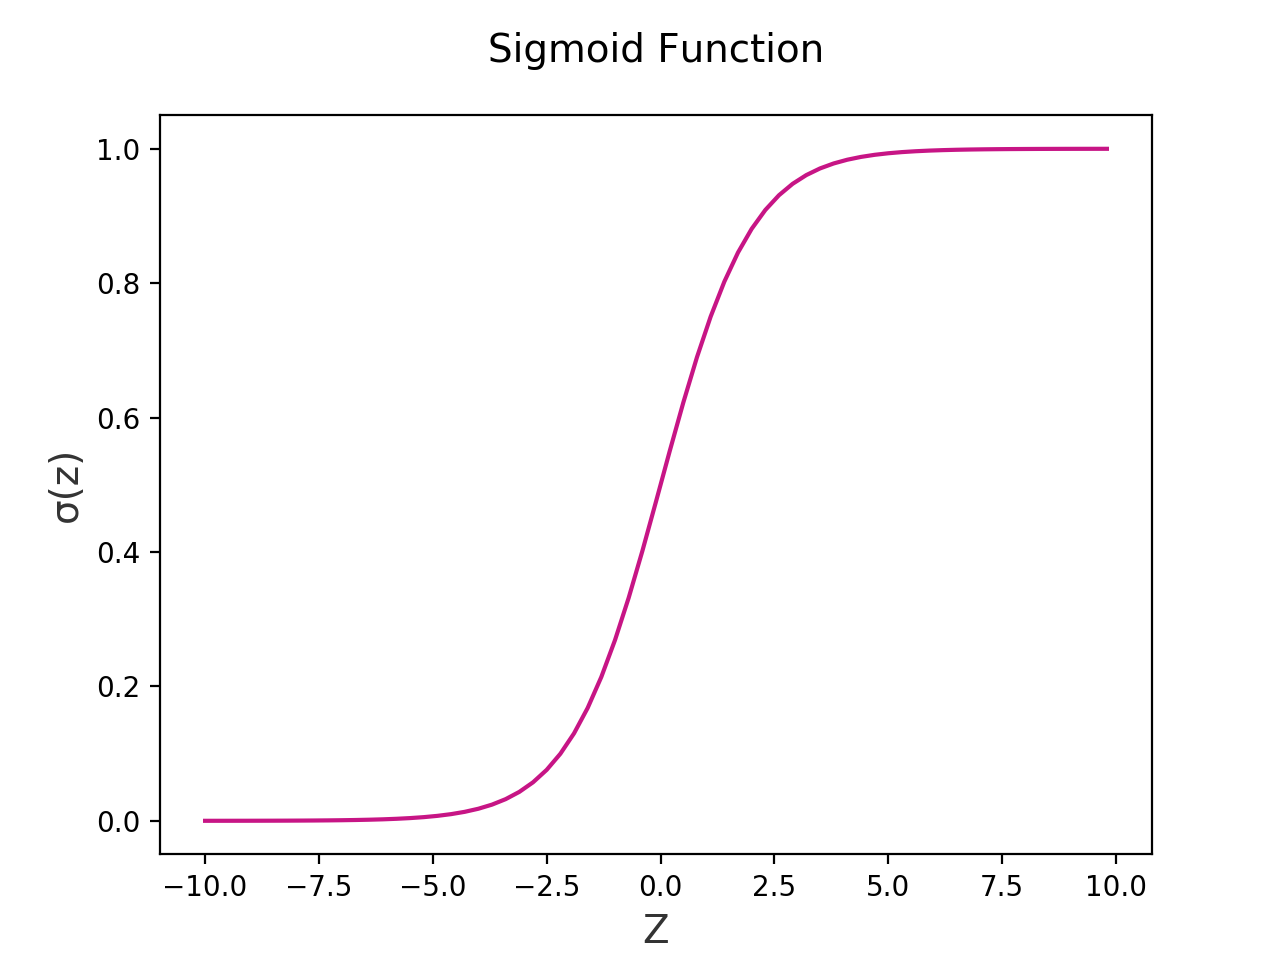

In [9]:
z = np.arange(-10, 10, 0.3)
sigm = 1 / (1 + np.exp(-z))
plt.plot(z, sigm, color = 'mediumvioletred', linewidth= 1.5)
plt.xlabel('Z', size = 14, alpha = 0.8)
plt.ylabel('σ(z)', size = 14, alpha = 0.8)
a = plt.title('Sigmoid Function', size = 14)
a.set_position([.5, 1.05])

<IPython.core.display.Javascript object>


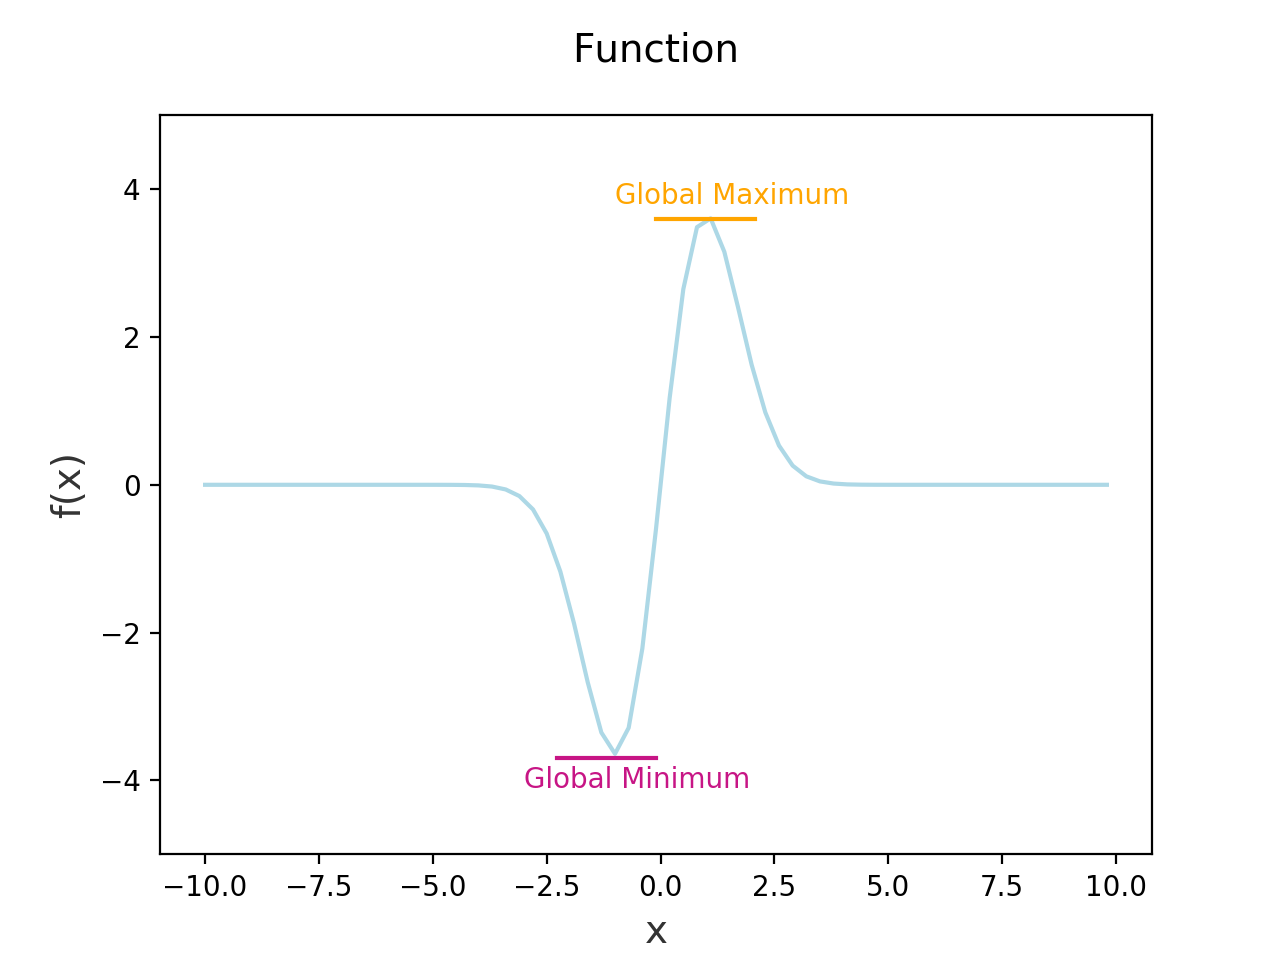

Text(-3, -4.1, 'Global Minimum')

In [64]:
points = np.arange(-10, 10, 0.3)
function_point = 6*points*np.exp((-points**2)/2)
plt.plot(points, function_point, color = 'lightblue', linewidth= 1.5)
plt.xlabel('x', size = 14, alpha = 0.8)
plt.ylabel('f(x)', size = 14, alpha = 0.8)
plt.ylim(-5, 5)
a = plt.title('Function', size = 14)
a.set_position([.5, 1.05])
plt.axhline(y= 3.6, xmin = 0.5, xmax = 0.6, color='orange')
plt.axhline(y= -3.7, xmin = 0.4, xmax = 0.5, color='mediumvioletred')
plt.text(s = "Global Maximum", x = -1, y = 3.8, color ="orange")
plt.text(s = "Global Minimum", x = -3, y = -4.1, color ="mediumvioletred")